In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif


In [5]:
#Load Data

df = pd.read_csv(r"C:\Users\mansi\OneDrive\Documents\Data_Cortex_Nuclear (1).csv")

In [6]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [7]:
summary_stats = df.describe().transpose()
print(summary_stats)

            count      mean       std       min       25%       50%       75%  \
DYRK1A_N   1077.0  0.425810  0.249362  0.145327  0.288121  0.366378  0.487711   
ITSN1_N    1077.0  0.617102  0.251640  0.245359  0.473361  0.565782  0.698032   
BDNF_N     1077.0  0.319088  0.049383  0.115181  0.287444  0.316564  0.348197   
NR1_N      1077.0  2.297269  0.347293  1.330831  2.057411  2.296546  2.528481   
NR2A_N     1077.0  3.843934  0.933100  1.737540  3.155678  3.760855  4.440011   
...           ...       ...       ...       ...       ...       ...       ...   
SYP_N      1080.0  0.446073  0.066432  0.258626  0.398082  0.448459  0.490773   
H3AcK18_N   900.0  0.169609  0.059402  0.079691  0.125848  0.158240  0.197876   
EGR1_N      870.0  0.183135  0.040406  0.105537  0.155121  0.174935  0.204542   
H3MeK4_N    810.0  0.205440  0.055514  0.101787  0.165143  0.193994  0.235215   
CaNA_N     1080.0  1.337784  0.317126  0.586479  1.081423  1.317441  1.585824   

                max  
DYRK1

In [8]:
#Data Preprocessing

X = df.drop(['MouseID', 'class'], axis=1)
y = df['class']

In [9]:
# Encode categorical target

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [10]:
# Drop non-numeric columns BEFORE imputation

X = df.drop(['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'], axis=1)

In [11]:
#All columns are numeric

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [12]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

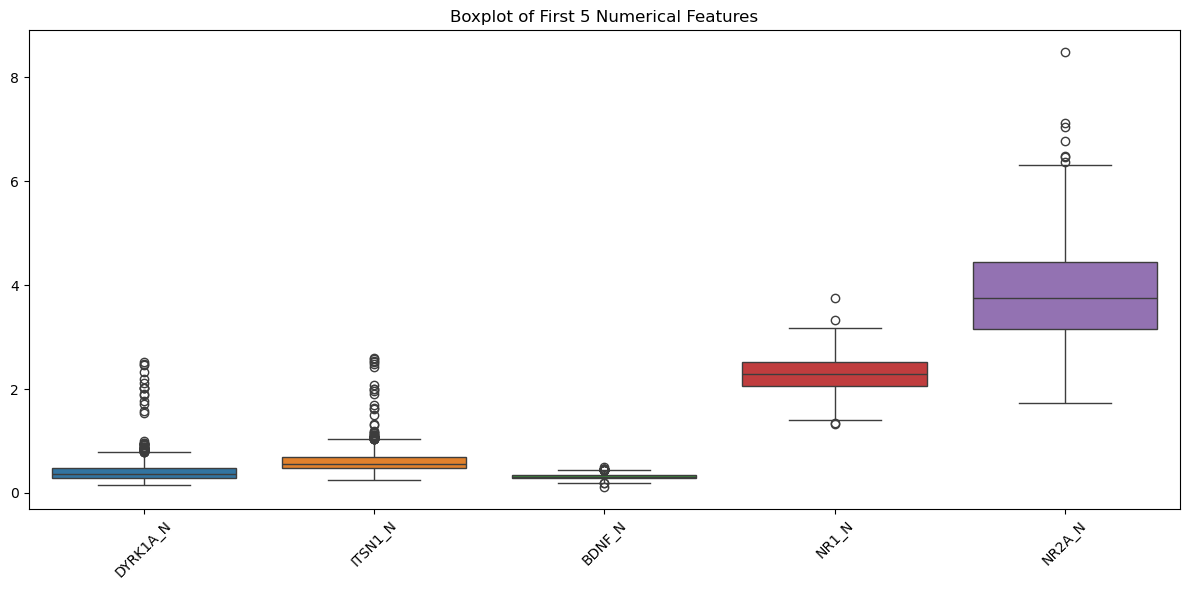

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


sample_features = df.select_dtypes(include='number').columns[:5]  

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[sample_features])
plt.title("Boxplot of First 5 Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


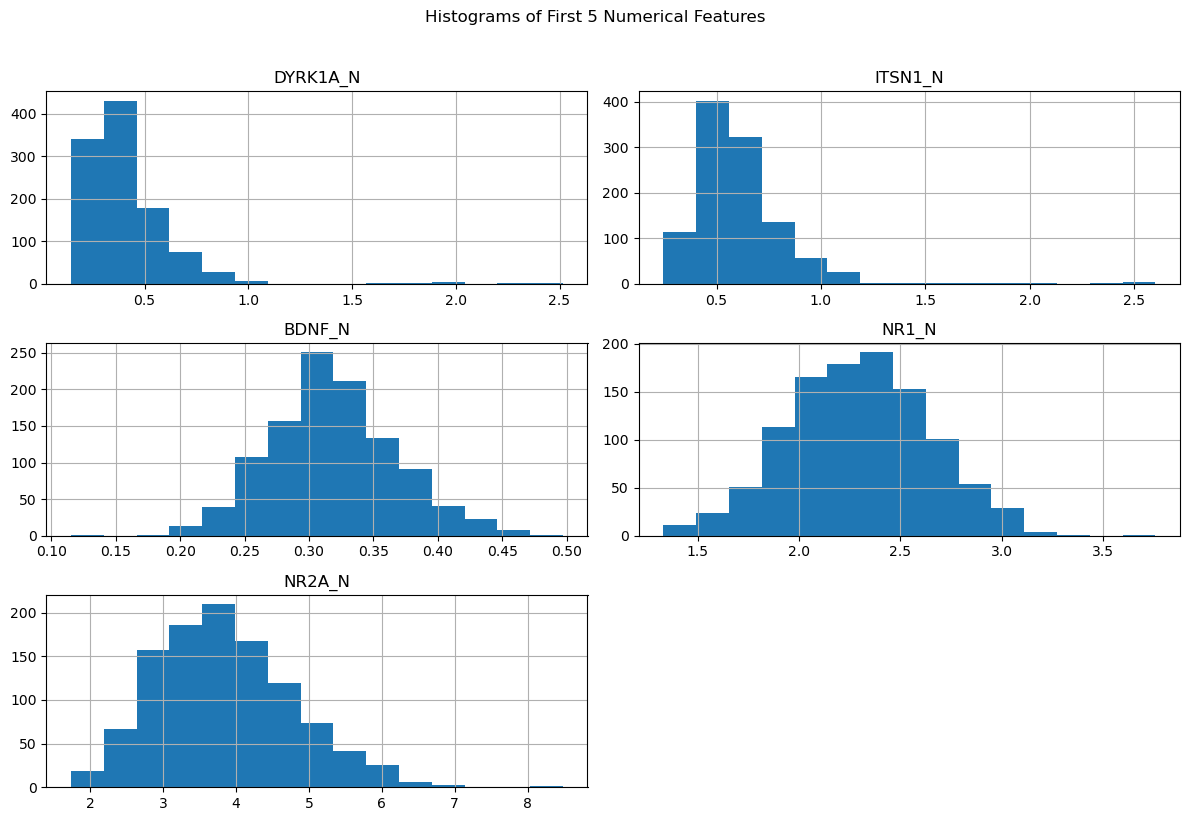

In [14]:
# Histogram
df[sample_features].hist(figsize=(12, 8), bins=15)
plt.suptitle("Histograms of First 5 Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

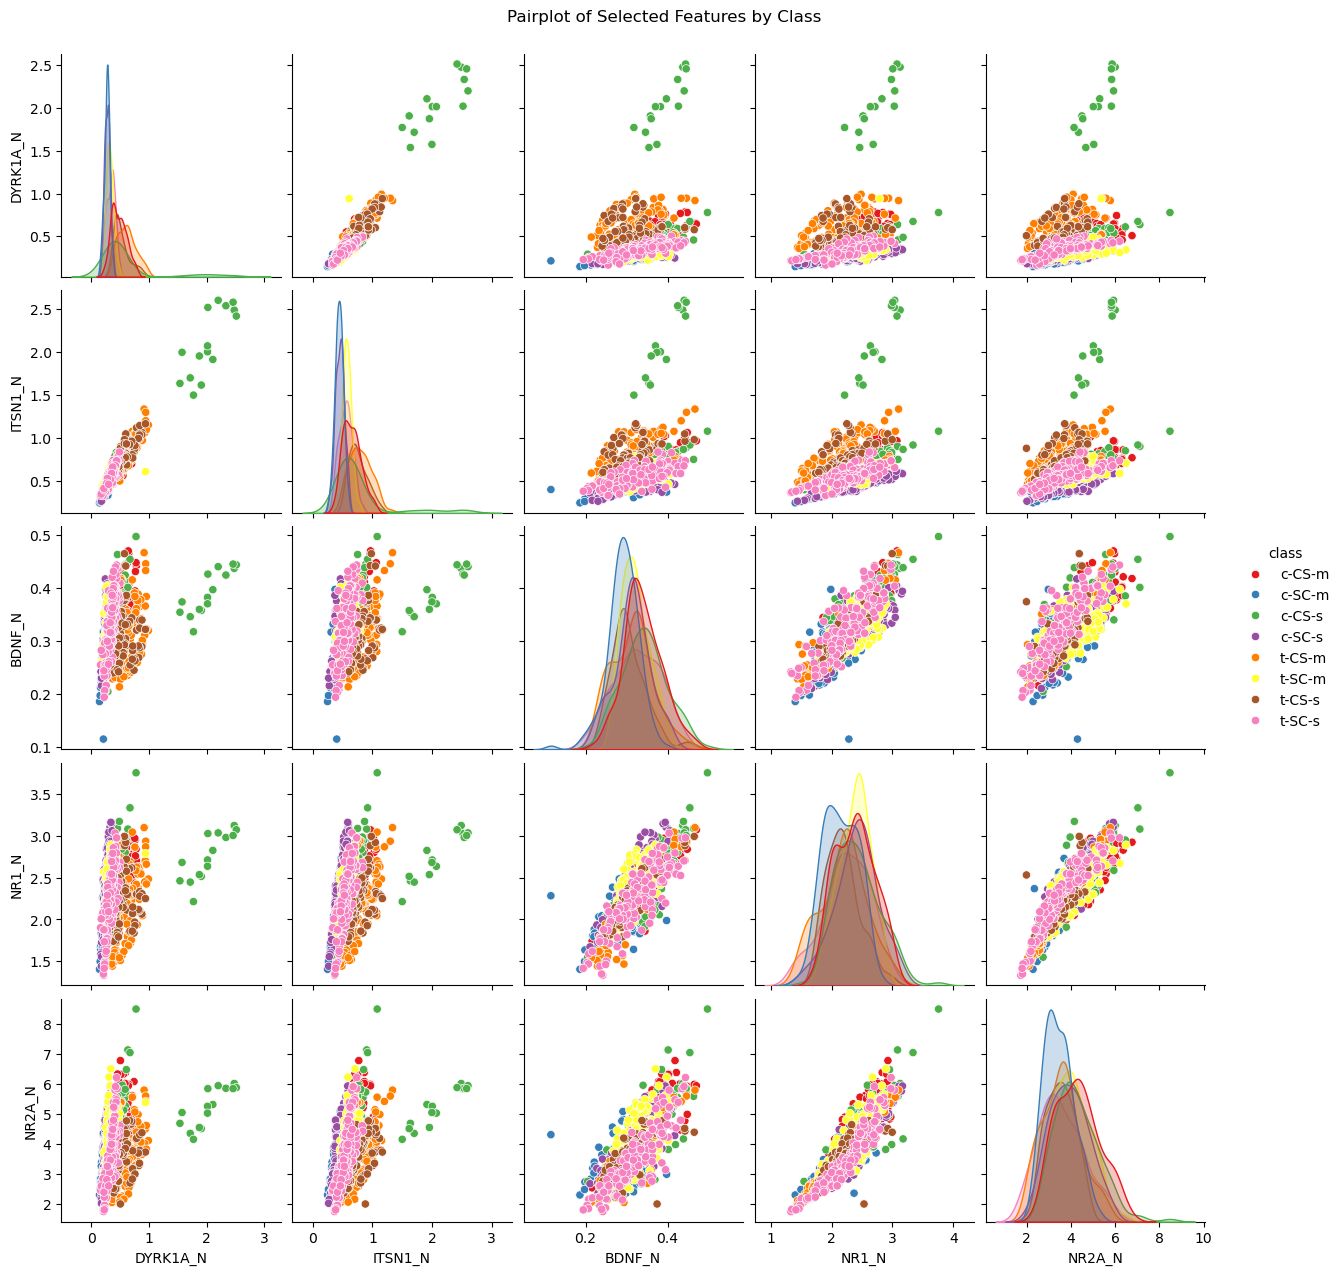

In [15]:
pairplot_features = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'class']
df_pairplot = df[pairplot_features].dropna()

#Pairplot
sns.pairplot(df_pairplot, hue='class', palette='Set1')
plt.suptitle("Pairplot of Selected Features by Class", y=1.02)
plt.show()

In [16]:
from scipy import stats
import numpy as np

# Detect outliers using Z-score
numerical_cols = df.select_dtypes(include=['number']).columns
print("Outlier Detection using Z-score Method:")
for column in numerical_cols:
    z_scores = np.abs(stats.zscore(df[column].dropna()))  
    threshold = 3
    outlier_count = (z_scores > threshold).sum()
    print(f" - {column}: {outlier_count} outliers")


Outlier Detection using Z-score Method:
 - DYRK1A_N: 15 outliers
 - ITSN1_N: 15 outliers
 - BDNF_N: 3 outliers
 - NR1_N: 1 outliers
 - NR2A_N: 4 outliers
 - pAKT_N: 9 outliers
 - pBRAF_N: 8 outliers
 - pCAMKII_N: 1 outliers
 - pCREB_N: 1 outliers
 - pELK_N: 20 outliers
 - pERK_N: 14 outliers
 - pJNK_N: 7 outliers
 - PKCA_N: 0 outliers
 - pMEK_N: 8 outliers
 - pNR1_N: 3 outliers
 - pNR2A_N: 5 outliers
 - pNR2B_N: 5 outliers
 - pPKCAB_N: 1 outliers
 - pRSK_N: 7 outliers
 - AKT_N: 4 outliers
 - BRAF_N: 15 outliers
 - CAMKII_N: 7 outliers
 - CREB_N: 7 outliers
 - ELK_N: 15 outliers
 - ERK_N: 5 outliers
 - GSK3B_N: 16 outliers
 - JNK_N: 8 outliers
 - MEK_N: 3 outliers
 - TRKA_N: 3 outliers
 - RSK_N: 8 outliers
 - APP_N: 4 outliers
 - Bcatenin_N: 1 outliers
 - SOD1_N: 16 outliers
 - MTOR_N: 8 outliers
 - P38_N: 8 outliers
 - pMTOR_N: 15 outliers
 - DSCR1_N: 21 outliers
 - AMPKA_N: 6 outliers
 - NR2B_N: 17 outliers
 - pNUMB_N: 6 outliers
 - RAPTOR_N: 6 outliers
 - TIAM1_N: 10 outliers
 - pP70

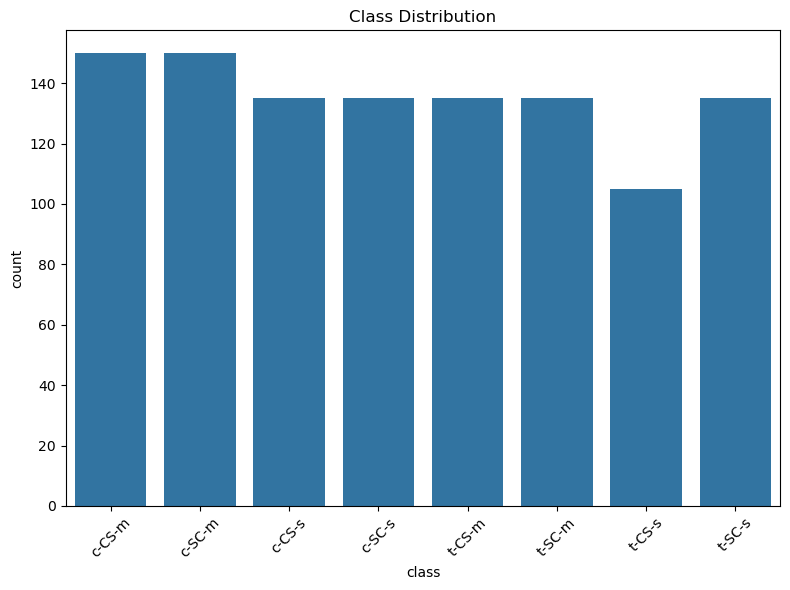

In [17]:
#EDA(Exploratory Data Analysis)

plt.figure(figsize=(8,6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#Feature Selection

selector = SelectKBest(score_func=f_classif, k=20) 
X_selected = selector.fit_transform(X_scaled, y_encoded)
selected_features = X_scaled.columns[selector.get_support()]

In [19]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)


In [23]:
# Model Training - SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.96      1.00      0.98        26
           2       0.96      0.96      0.96        27
           3       1.00      1.00      1.00        34
           4       1.00      0.95      0.97        19
           5       1.00      1.00      1.00        22
           6       0.96      0.96      0.96        25
           7       1.00      1.00      1.00        31

    accuracy                           0.99       216
   macro avg       0.99      0.98      0.98       216
weighted avg       0.99      0.99      0.99       216

SVM Confusion Matrix:
 [[32  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  1  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  1  0  0 18  0  0  0]
 [ 0  0  0  0  0 22  0  0]
 [ 0  0  1  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 31]]


In [24]:
# Neural Network 
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

print("MLP Neural Network Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("MLP Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


MLP Neural Network Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.96      1.00      0.98        26
           2       0.96      0.96      0.96        27
           3       1.00      1.00      1.00        34
           4       1.00      0.95      0.97        19
           5       1.00      1.00      1.00        22
           6       0.96      0.96      0.96        25
           7       1.00      1.00      1.00        31

    accuracy                           0.99       216
   macro avg       0.99      0.98      0.98       216
weighted avg       0.99      0.99      0.99       216

MLP Confusion Matrix:
 [[32  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  1  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  1  0  0 18  0  0  0]
 [ 0  0  0  0  0 22  0  0]
 [ 0  0  1  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 31]]


In [31]:
#RandomForest

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_test)             # Random Forest
y_pred_svm = svm_model.predict(X_test)     # SVM
y_pred_mlp = mlp_model.predict(X_test)     # MLP


accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print("Model Accuracy Comparison:")
print(f"Random Forest:      {accuracy_rf:.4f}")
print(f"SVM:                {accuracy_svm:.4f}")
print(f"MLP NeuralNet:      {accuracy_mlp:.4f}")


Model Accuracy Comparison:
Random Forest:      0.9630
SVM:                0.9861
MLP NeuralNet:      0.9861


In [27]:
#Model Evaluation

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       1.00      0.92      0.96        26
           2       0.96      0.93      0.94        27
           3       0.92      0.97      0.94        34
           4       1.00      1.00      1.00        19
           5       1.00      0.95      0.98        22
           6       0.96      0.92      0.94        25
           7       1.00      1.00      1.00        31

    accuracy                           0.96       216
   macro avg       0.97      0.96      0.96       216
weighted avg       0.96      0.96      0.96       216

Confusion Matrix:
 [[32  0  0  0  0  0  0  0]
 [ 2 24  0  0  0  0  0  0]
 [ 0  0 25  2  0  0  0  0]
 [ 0  0  0 33  0  0  1  0]
 [ 0  0  0  0 19  0  0  0]
 [ 1  0  0  0  0 21  0  0]
 [ 0  0  1  1  0  0 23  0]
 [ 0  0  0  0  0  0  0 31]]


In [28]:
from sklearn.model_selection import cross_val_score

# Cross-validation on Random Forest
cv_scores_rf = cross_val_score(model, X_selected, y_encoded, cv=5)
print("Random Forest CV Accuracy:", cv_scores_rf.mean())

# Cross-validation on SVM
cv_scores_svm = cross_val_score(svm_model, X_selected, y_encoded, cv=5)
print("SVM CV Accuracy:", cv_scores_svm.mean())

# Cross-validation on MLP
cv_scores_mlp = cross_val_score(mlp_model, X_selected, y_encoded, cv=5)
print("MLP CV Accuracy:", cv_scores_mlp.mean())


Random Forest CV Accuracy: 0.6222222222222221
SVM CV Accuracy: 0.725925925925926
MLP CV Accuracy: 0.7175925925925926


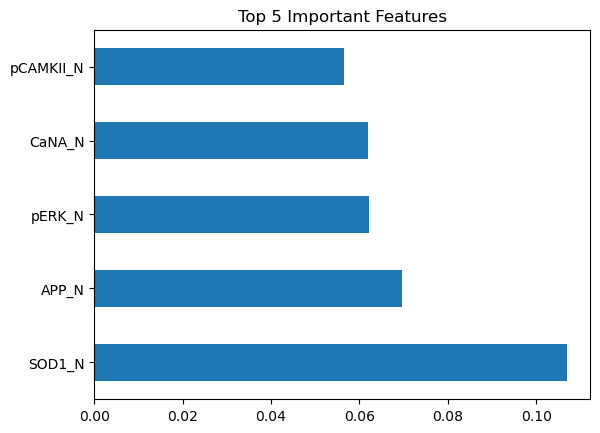

In [35]:
#Interpretation 

feature_importance = pd.Series(model.feature_importances_, index=selected_features)
feature_importance.nlargest(5).plot(kind='barh')
plt.title("Top 5 Important Features")
plt.show()
